# **Data Science Intern at InfoPillar Solution Pvt Ltd - VIrtual Internship Program**

# **Author : LAKSHMI MOUNIKA KELAM**

# **Level : Begineer**
# **Task 1 : Iris Flowers Classification Project**

# SOURCE OF DATASET
Dataset: https://archive.ics.uci.edu/ml/datasets/Iris

# Here we are going to use 4 different algorithms for classification namely, K-Nearest Neighbours, Decision Tree, Support Vector Machine and Random Forest.

# import libraries and modules

In [258]:
# general and data handling
import numpy as np
import pandas as pd
import os
from collections import Counter
from sklearn.metrics import roc_auc_score
# modeling
import sklearn as sk
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# Graphing
import matplotlib.pyplot as plt
import seaborn as sns

# importing dataset

In [259]:
import pandas as pd
import numpy as np
Location = r'C:\Users\niper5\mounika_model\Iris_Data.csv'
df = pd.read_csv(Location)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [260]:
df.shape

(150, 5)

# converting descriptor values in array

In [261]:
x_morg = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

In [262]:
#classification labels
y = df.species.values

# splitting of dataset into traning and test

In [263]:
#Partitioning the data into an 70/30 train/test split
x_morg_train, x_morg_test, y_morg_train, y_morg_test = train_test_split(x_morg, y, test_size=0.30, random_state=1,stratify=y)

In [264]:
len(x_morg_train),len(x_morg_test)

(105, 45)

# Normalization of data¶

In [265]:
from sklearn import preprocessing

In [266]:
x_morg_train = preprocessing.StandardScaler().fit(x_morg_train).transform(x_morg_train.astype(float))
x_morg_train[0:5]

array([[-0.4301064 ,  2.63118533, -1.33269725, -1.30380366],
       [-0.55053619,  0.76918392, -1.16537974, -1.30380366],
       [ 0.65376173,  0.30368356,  0.84243039,  1.44465434],
       [ 1.0150511 ,  0.53643374,  1.0655204 ,  1.18289644],
       [-1.03225536,  0.30368356, -1.44424226, -1.30380366]])

In [267]:
x_morg_test = preprocessing.StandardScaler().fit(x_morg_test).transform(x_morg_test.astype(float))
x_morg_test[0:5]

array([[ 0.47865332,  0.87709451,  1.0240263 ,  1.45595692],
       [-0.50600494,  2.02445651, -1.18739236, -1.06907993],
       [-1.49066319,  0.87709451, -1.36669657, -1.20197661],
       [-1.12141635, -1.1881571 ,  0.48611365,  0.65857686],
       [ 0.97098245, -0.04079509,  0.42634558,  0.25988683]])

In [268]:
def confusion_matrix_plot(predictions):
    labels = ['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']

    matrix = confusion_matrix(predictions,y_morg_test,labels=labels)

    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.heatmap(matrix, annot = True, xticklabels = labels, yticklabels = labels, cmap = "Blues")
    ax.set_title("Confusion Matrix", fontsize=18)
    ax.set_xlabel("Predicted", fontsize=14)
    ax.set_ylabel("Actual", fontsize=14)

# 1.support vector machine model

# tunning of parameters

In [269]:
from sklearn.svm import SVC
model1 =SVC(class_weight='balanced',random_state=0)
#tunning
kernel=['rbf','linear']
C=[0.1,0.01,0.001,1]
gamma=[0.1,0.01,0.001,1]
tuning_parameters = dict( C=C,gamma=gamma,kernel=kernel)
#grid search
grid1=GridSearchCV(model1,tuning_parameters,cv=5,scoring='accuracy', n_jobs=-1)
# fit model
model1t= grid1.fit(x_morg,y)
print("Best parameters for the SVM model: \n", model1t.best_params_)
print("accuracy for the SVM model: \n", model1t.best_score_)

Best parameters for the SVM model: 
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy for the SVM model: 
 0.9800000000000001


# model development

In [270]:
svm =SVC(kernel='rbf',C=1,gamma=0.1,class_weight='balanced',random_state=0)
#Fit the model with the training data X_train and y_train
svm.fit(x_morg_train, y_morg_train)

SVC(C=1, class_weight='balanced', gamma=0.1, random_state=0)

# predictions

In [273]:
#Use the test data X_test to predict the output,predictions_svm
predictions_svm = svm.predict(x_morg_test)
#Use the real values y_test and the predicted values yhat_KNN to find the accuracy of the model 
print("Accuracy of the SVM model: ", accuracy_score(y_morg_test, predictions_svm))

Accuracy of the SVM model:  0.9555555555555556


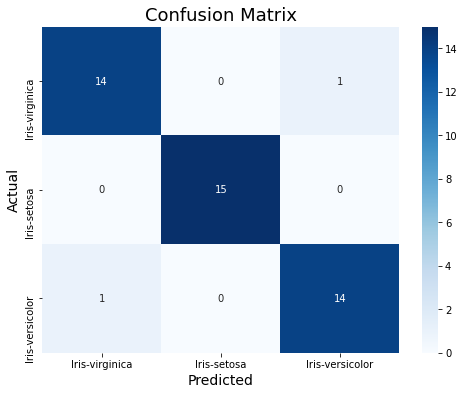

In [226]:
#Plot the confusion matrix. Use the predicted values, yhat_KNN as the attribute.
confusion_matrix_plot(predictions_svm)

# predictions

# 2. random forest

# tunning of parameters

In [227]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(class_weight='balanced',random_state=0)
#tunning
n_estimators =list(range(1,100))
tuning_parameters = dict(n_estimators = n_estimators)
#grid search
grid2=GridSearchCV(model2,tuning_parameters,cv=5,scoring='accuracy',n_jobs=-1)
# fit model
model2t= grid2.fit(x_morg,y)
print("Best parameters for the RandomForest: \n", model2t.best_params_)
print("accuracy for the RandomForest model: \n", model2t.best_score_)

Best parameters for the RandomForest: 
 {'n_estimators': 31}
accuracy for the RandomForest model: 
 0.9666666666666668


# model development

In [228]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=31,random_state=0, class_weight='balanced')
#Fit the model with the training data X_train and y_train
rf.fit(x_morg_train, y_morg_train)

RandomForestClassifier(class_weight='balanced', n_estimators=31, random_state=0)

# predictions

In [274]:
#Use the test data X_test to predict the output,predictions_svm
predictions_rf = rf.predict(x_morg_test)
#Use the real values y_test and the predicted values yhat_KNN to find the accuracy of the model 
print("Accuracy of the RandomForest model: ", accuracy_score(y_morg_test, predictions_rf))

Accuracy of the RandomForest model:  0.9777777777777777


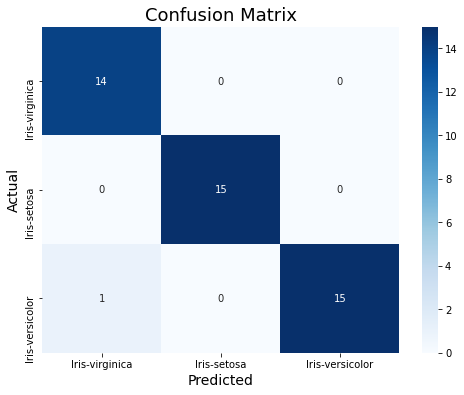

In [230]:
#Plot the confusion matrix. Use the predicted values, yhat_KNN as the attribute.
confusion_matrix_plot(predictions_rf)

# 3. knn

# tunning of parameters¶

In [231]:
from sklearn.neighbors import KNeighborsClassifier
model3= KNeighborsClassifier()
n_neighbors =list(range(1,10))
tuning_parameters = dict(n_neighbors=n_neighbors)
#grid search
grid3=GridSearchCV(model3,tuning_parameters,cv=5,scoring='accuracy',n_jobs=-1)
# fit model
model3t= grid3.fit(x_morg,y)
print("Best parameters for the knn: \n", model3t.best_params_)
print("accuracy for the knn model: \n", model3t.best_score_)

Best parameters for the knn: 
 {'n_neighbors': 6}
accuracy for the knn model: 
 0.9800000000000001


# model development¶

In [232]:
#KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=6)
#model training
knn.fit(x_morg_train, y_morg_train)

KNeighborsClassifier(n_neighbors=6)

# predictions

In [233]:
#Use the test data X_test to predict the output,predictions_svm
predictions_knn = knn.predict(x_morg_test)
#Use the real values y_test and the predicted values yhat_KNN to find the accuracy of the model 
print("Accuracy of the knn model: ", accuracy_score(y_morg_test, predictions_knn))

Accuracy of the knn model:  0.9777777777777777


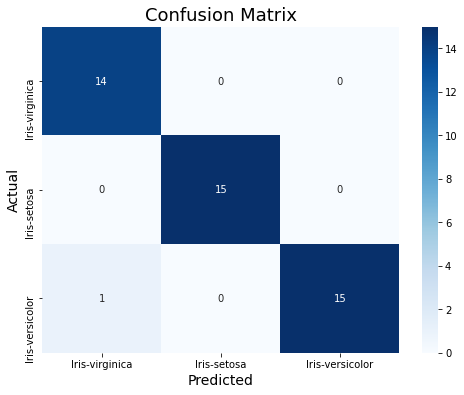

In [234]:
#Plot the confusion matrix. Use the predicted values, yhat_KNN as the attribute.
confusion_matrix_plot(predictions_knn)

# DecisionTreeClassifier

# tunning of parameters

In [236]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(random_state=0)
max_depth = list(range(1,100))
max_features=list(range(1,300))
tuning_parameters = dict(max_depth=max_depth,max_features=max_features)
#grid search
grid4=GridSearchCV(model4,tuning_parameters,cv=3,scoring='accuracy', n_jobs=-1,)
# fit model
model4t= grid4.fit(x_morg,y)
print("Best parameters for the dt model: \n", model4t.best_params_)
print("accuracy for the dt model: \n", model4t.best_score_)

Best parameters for the dt model: 
 {'max_depth': 3, 'max_features': 3}
accuracy for the dt model: 
 0.9733333333333333


C:\Users\niper5\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.51333333 0.66       0.66       ...        nan        nan        nan]
  warnings.warn(


# model development¶

In [237]:
#KNeighborsClassifier
dt= DecisionTreeClassifier(max_depth=2,max_features=2,random_state=0)
#model training
dt.fit(x_morg_train, y_morg_train)

DecisionTreeClassifier(max_depth=2, max_features=2, random_state=0)

# predictions

In [238]:
#Use the test data X_test to predict the output,predictions_svm
predictions_dt = dt.predict(x_morg_test)
#Use the real values y_test and the predicted values yhat_KNN to find the accuracy of the model 
print("Accuracy of the knn model: ", accuracy_score(y_morg_test,predictions_dt))

Accuracy of the knn model:  0.9777777777777777


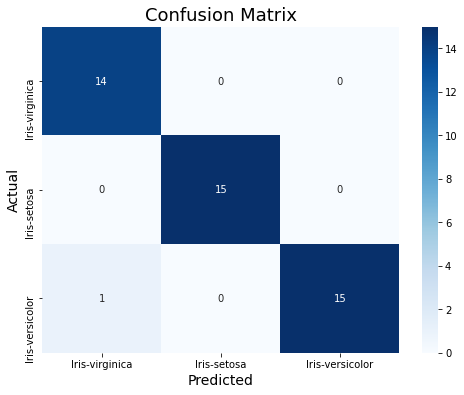

In [239]:
#Plot the confusion matrix. Use the predicted values, yhat_KNN as the attribute.
confusion_matrix_plot(predictions_dt)

## Thank you

I hope you found the project useful and interesting. Feel free to contact me if you have any queries or suggestions.

This notebook was developed by [LAKSHMI MOUNIKA ](https://www.linkedin.com/in/mounika-kelam-a9179b196/).